In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.lines as mlines
import seaborn as sns
from scipy.stats import norm
from scipy.stats import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint

## Disclaimer
This notebook based on labs from Inferential Statistics course by Duke University from https://www.coursera.org/learn/inferential-statistics-intro <br>
I adapted R code from these labs and reproduced in Jupyter Notebooks and rewrote in Python

## Inference for categorical data
In August of 2012, news outlets ranging from the [Washington Post](http://www.washingtonpost.com/national/on-faith/poll-shows-atheism-on-the-rise-in-the-us/2012/08/13/90020fd6-e57d-11e1-9739-eef99c5fb285_story.html) to the [Huffington Post](http://www.huffingtonpost.com/2012/08/14/atheism-rise-religiosity-decline-in-america_n_1777031.html) ran a story about the rise of atheism in America. The source for the story was a poll that asked people, "Irrespective of whether you attend a place of worship or not, would you say you are a religious person, not a religious person or a convinced atheist?" This type of question, which asks people to classify themselves in one way or another, is common in polling and generates categorical data. In this lab we take a look at the atheism survey and explore what's at play when making inference about population proportions using categorical data.

### The survey

The press release for the poll, conducted by WIN-Gallup International, can be accessed [here](https://www.scribd.com/document/136318147/Win-gallup-International-Global-Index-of-Religiosity-and-Atheism-2012).


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AntonIsHere/Inferetial_Statistics/master/atheism.csv")
df.rename(columns={df.columns[0]: "number" }, inplace = True)
df.groupby('response').count()['number']
df.head()

,number,nationality,response,year
0,1,Afghanistan,non-atheist,2012
1,2,Afghanistan,non-atheist,2012
2,3,Afghanistan,non-atheist,2012
3,4,Afghanistan,non-atheist,2012
4,5,Afghanistan,non-atheist,2012


Create a new dataframe called df2012 that contains only the rows in atheism associated with respondents to the 2012 survey from the United States:

In [3]:
pd.set_option('mode.chained_assignment', None)
df2012USA = df.loc[(df['nationality'] == 'United States') & (df['year'] == 2012)]
df2012USA.reset_index(inplace=True)
df2012USA.drop(['number', 'index'], axis = 1, inplace = True) 
#del df2012['number']
#del df2012['index']

In [4]:
df2012USA.head()

,nationality,response,year
0,United States,non-atheist,2012
1,United States,non-atheist,2012
2,United States,non-atheist,2012
3,United States,non-atheist,2012
4,United States,non-atheist,2012


In [5]:
bar_data = df2012USA['response'].value_counts(normalize = False).to_frame()
#plt.bar(,x['response'])

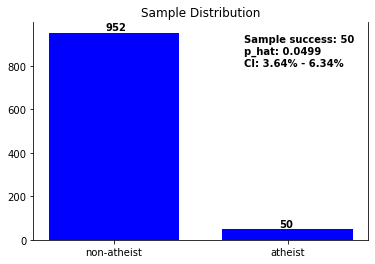

In [6]:
z_95 = norm.ppf(.975)
x = bar_data.index
y = bar_data['response']
sample_size = df2012USA.shape[0]
sample_success = df2012USA.loc[(df2012USA['response']=='atheist')].shape[0]
p_hat = sample_success/df2012USA.shape[0]
CI_low, CI_high = proportion_confint(sample_success, sample_size, alpha=0.05, method='normal')

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
for i, v in enumerate(y):
    ax.text(i-0.05,v+10, str(v), color='black', fontweight='bold')
ax.text(0.75,800, str('Sample success: ') + str(sample_success) 
        + str('\np_hat: ') + str(round(p_hat,4)) 
        + str('\nCI: ')+ str(round(CI_low*100,2)) + str('% - ') + str(round(CI_high*100,2)) + str('%'), 
        color='black', fontweight='bold')
ax.bar(ind,y, width, color="blue")
ax.set_xticks(ind)
ax.set_xticklabels(x, minor=False)
plt.title('Sample Distribution')
plt.gca().spines["top"].set_alpha(0.0)    
plt.show()

In general, the error margin for surveys of this kind is ± 3-5% at 95% confidence.

In [7]:
SE = ((p_hat*(1-p_hat))/sample_size)**0.5
ME = SE * z_95
print('Standard error: ' + str(SE))
print('Margin of error: ' + str(ME))

Standard error: 0.006878629122390021
Margin of error: 0.0134818653428928


### How does the proportion affect the margin of error?

Imagine you’ve set out to survey 1000 people on two questions: are you female? and are you left-handed? Since both of these sample proportions were calculated from the same sample size, they should have the same margin of error, right? Wrong! While the margin of error does change with sample size, it is also affected by the proportion.

Think back to the formula for the standard error: <p>$SE={\sqrt{p(1−p)/n}}$</p> This is then used in the formula for the margin of error for a 95% confidence interval: <p>$ME=1.96×SE=1.96×{\sqrt{p(1−p)/n}}$</p> Since the population proportion **p** is in this **ME** formula, it should make sense that the margin of error is in some way dependent on the population proportion. We can visualize this relationship by creating a plot of **ME vs. p**.

The first step is to make a vector **p** that is a sequence from **0 to 1** with each number separated by **0.01**. We can then create a vector of the margin of error (me) associated with each of these values of **p** using the familiar approximate formula **(ME=1.96×SE)**. Lastly, we plot the two vectors against each other to reveal their relationship.

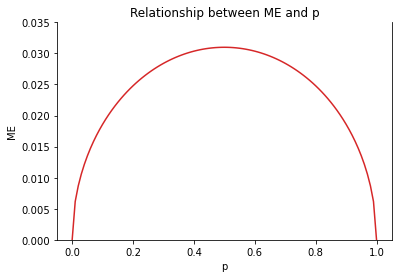

In [8]:
df_p = pd.DataFrame(columns =['ME', 'p'])
for p in np.arange(0,1.01,0.01):
    ME = z_95 * (((p*(1-p))/1000)**0.5)
    df_p = df_p.append({'ME': ME, 'p': p},ignore_index=True)
df_p

# Draw Plot
fig, ax = plt.subplots()    
ax.plot('p', 'ME', data=df_p, color='tab:red')

# Decoration
ax.set_title('Relationship between ME and p')
ax.set_ylabel('ME')
ax.set_xlabel('p')
plt.ylim(0.00, 0.035)
plt.gca().spines["top"].set_alpha(0.0)    
plt.show()